<a href="https://colab.research.google.com/github/Subrahmanyam2005/SCHOOL-ADMISSION-ANALYTICS/blob/main/School_admission_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/student_admission_dataset.csv')
df

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted
...,...,...,...,...
245,3.57,1024,3,Rejected
246,2.86,1367,1,Waitlisted
247,3.09,1036,3,Waitlisted
248,3.51,1375,5,Waitlisted


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GPA                         250 non-null    float64
 1   SAT_Score                   250 non-null    int64  
 2   Extracurricular_Activities  250 non-null    int64  
 3   Admission_Status            250 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 7.9+ KB


In [5]:
df.head()

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted


In [6]:
df.describe()

,GPA,SAT_Score,Extracurricular_Activities
count,250.000000,250.000000,250.000000
mean,3.238320,1250.432000,5.204000
std,0.438607,204.733163,2.964716
min,2.500000,900.000000,0.000000
25%,2.850000,1080.250000,3.000000
50%,3.230000,1237.000000,5.000000
75%,3.590000,1426.000000,7.750000
max,4.000000,1598.000000,10.000000


In [8]:
df.isnull().sum()

,0
GPA,0
SAT_Score,0
Extracurricular_Activities,0
Admission_Status,0


In [9]:
#Value counts for target variable
df['Admission_Status'].value_counts()

,count
Admission_Status,
Waitlisted,88
Rejected,81
Accepted,81


In [11]:
#Check unique values in each column
df.nunique()

,0
GPA,123
SAT_Score,215
Extracurricular_Activities,11
Admission_Status,3


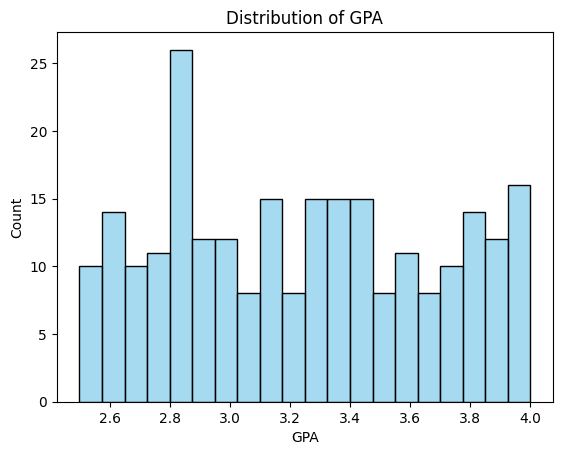

In [13]:
#GPA Histogram
sns.histplot(df['GPA'],bins=20,kde=False,color='skyblue')
plt.title('Distribution of GPA')
plt.show()

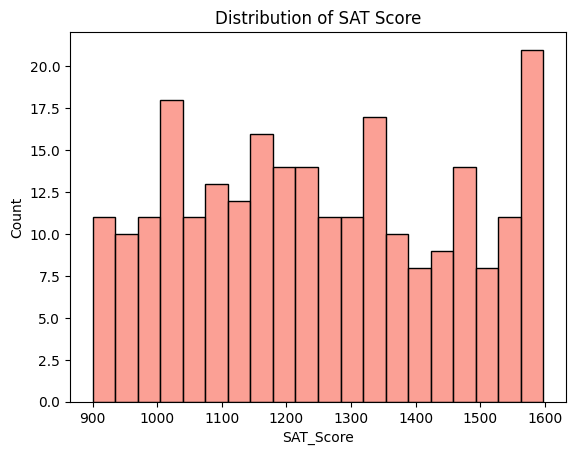

In [14]:
#SAT Score Histogram
sns.histplot(df['SAT_Score'],bins=20,kde=False,color='salmon')
plt.title('Distribution of SAT Score')
plt.show()

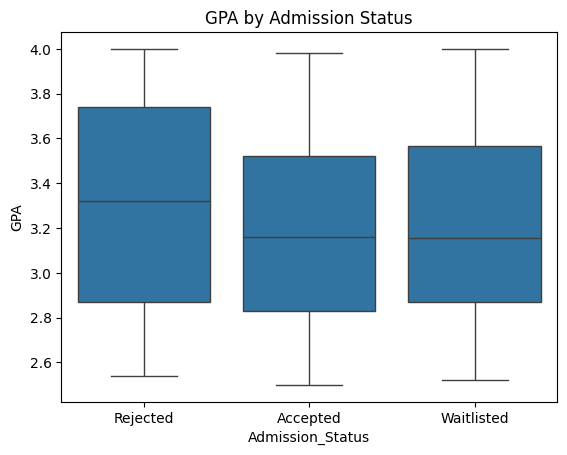

In [17]:
# Boxplot: GPA vs Admission Status
sns.boxplot(x='Admission_Status', y='GPA', data=df)
plt.title('GPA by Admission Status')
plt.show()

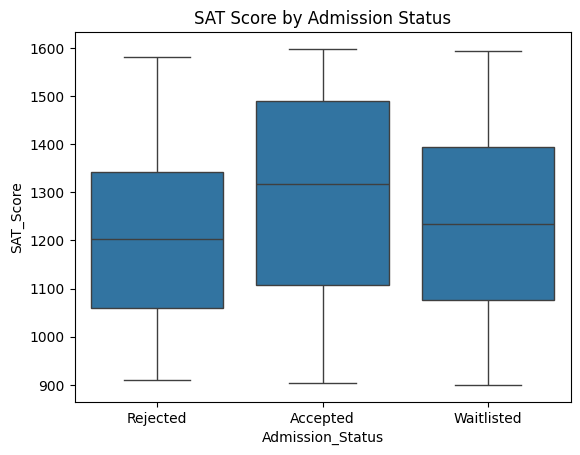

In [18]:
# Boxplot: SAT_Score vs Admission Status
sns.boxplot(x='Admission_Status', y='SAT_Score', data=df)
plt.title('SAT Score by Admission Status')
plt.show()

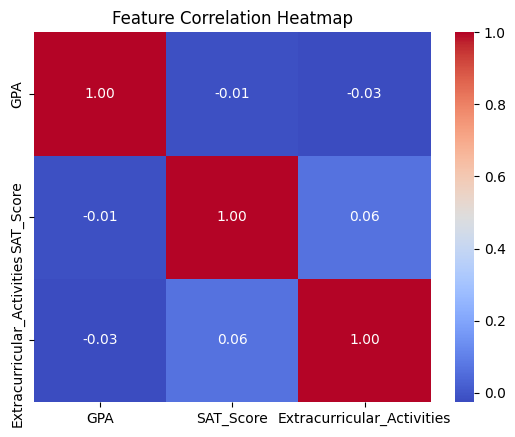

In [19]:
# Heatmap of correlations
corr = df.drop(columns=['Admission_Status']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

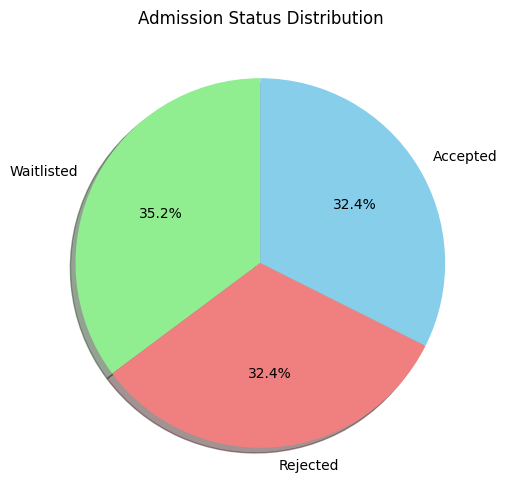

In [24]:
# Pie chart for Admission Status
plt.figure(figsize=(6,6))
df['Admission_Status'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'lightcoral', 'skyblue'],
    shadow=True,
    explode=(0,0,0) # Modified explode to have length 3
)
plt.title('Admission Status Distribution')
plt.ylabel('')
plt.show()

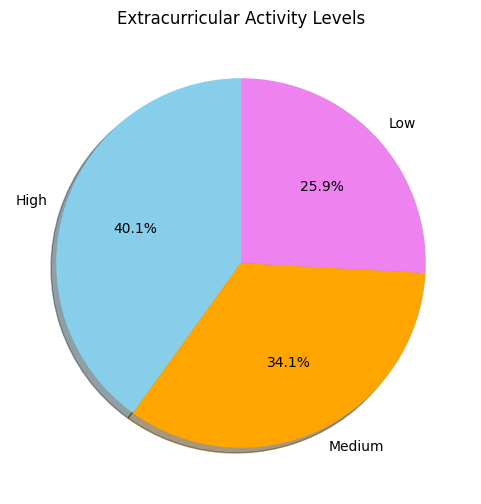

In [25]:
# Bin Extracurricular Activities into categories
activity_bins = pd.cut(df['Extracurricular_Activities'], bins=[0, 3, 6, 10], labels=['Low', 'Medium', 'High'])

# Pie chart for Activity Levels
plt.figure(figsize=(6,6))
activity_bins.value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'orange', 'violet'],
    shadow=True,
    explode=(0,0,0)
)
plt.title('Extracurricular Activity Levels')
plt.ylabel('')
plt.show()


/tmp/ipython-input-26-2818383987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Admission_Status', data=df, palette='Set2')


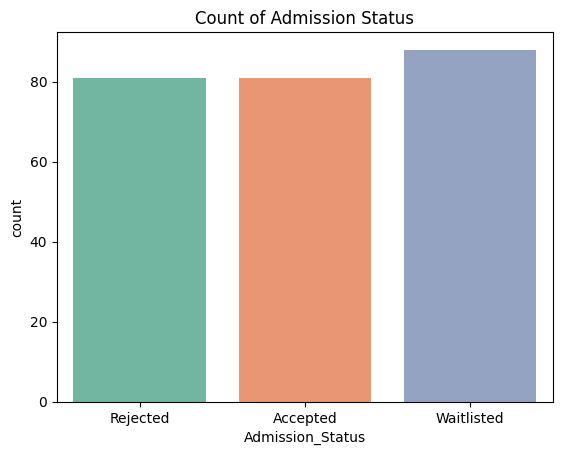

In [26]:
# Count of admission status
sns.countplot(x='Admission_Status', data=df, palette='Set2')
plt.title('Count of Admission Status')
plt.show()


/tmp/ipython-input-28-3460717922.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Admission_Status', y='GPA', data=df, palette='Set1')


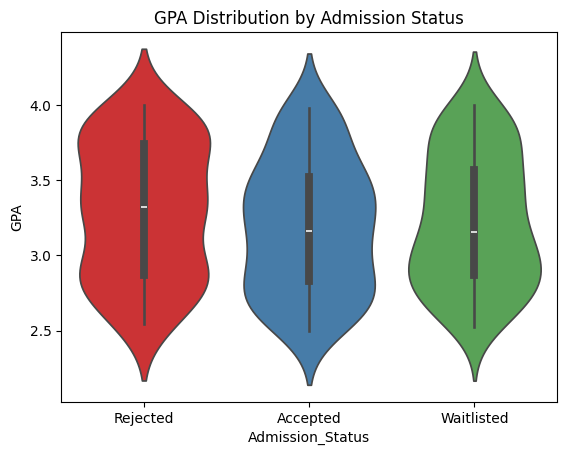

In [28]:
#Violin Plot (Distribution + Density + Outliers)
sns.violinplot(x='Admission_Status', y='GPA', data=df, palette='Set1')
plt.title('GPA Distribution by Admission Status')
plt.show()


/tmp/ipython-input-33-3198165095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Admission_Status', y='SAT_Score', data=df, jitter=True, palette='Set2')


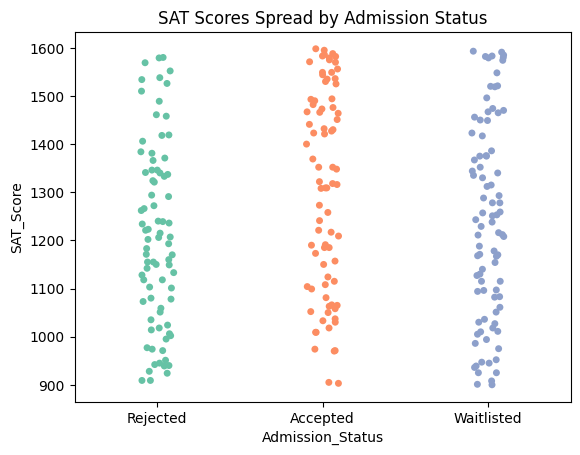

In [33]:
 #Strip Plot (Raw data scatter on categories)
sns.stripplot(x='Admission_Status', y='SAT_Score', data=df, jitter=True, palette='Set2')
plt.title('SAT Scores Spread by Admission Status')
plt.show()


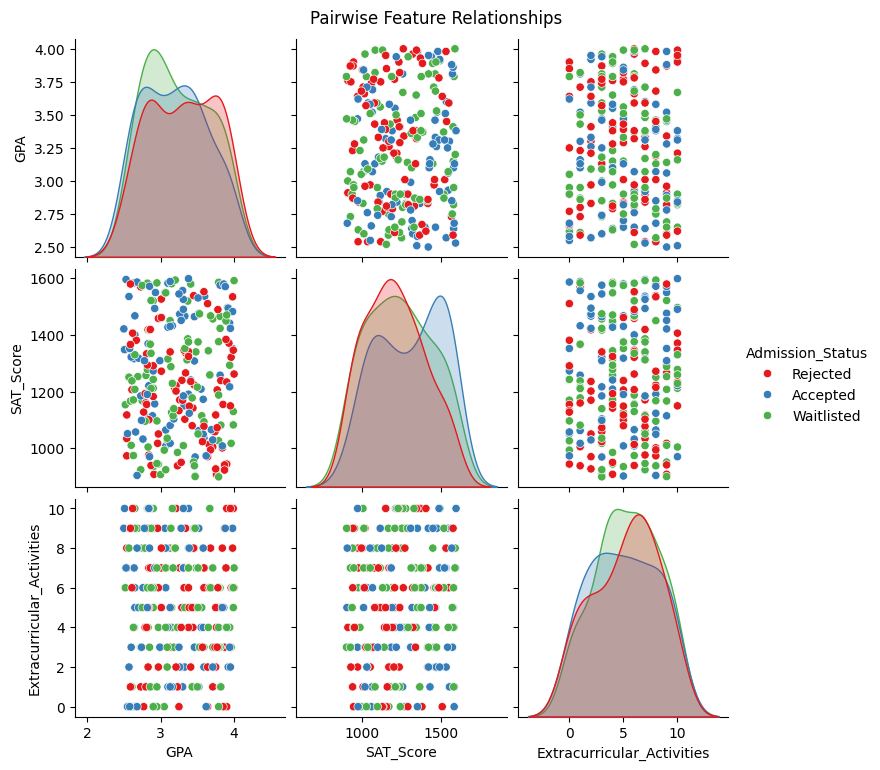

In [38]:
#Pair plot (All pairwise relationships)
sns.pairplot(df, hue='Admission_Status', diag_kind='kde', palette='Set1')
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()


/tmp/ipython-input-39-1513460721.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Admission_Status', y='GPA', data=df, palette='Accent')


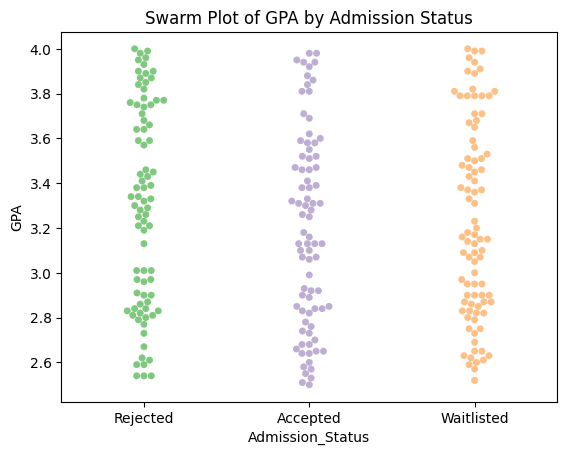

In [39]:
# Swarm Plot (Improved strip plot without overlap)
sns.swarmplot(x='Admission_Status', y='GPA', data=df, palette='Accent')
plt.title('Swarm Plot of GPA by Admission Status')
plt.show()


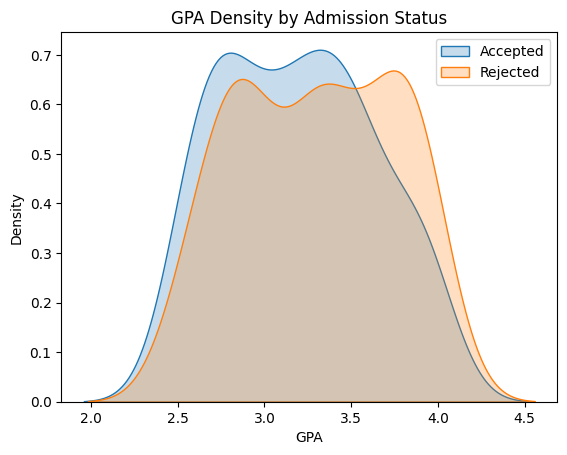

In [40]:
#KDE Plot (Smooth curve of feature distribution)
sns.kdeplot(df[df['Admission_Status'] == 'Accepted']['GPA'], label='Accepted', fill=True)
sns.kdeplot(df[df['Admission_Status'] == 'Rejected']['GPA'], label='Rejected', fill=True)
plt.title('GPA Density by Admission Status')
plt.legend()
plt.show()

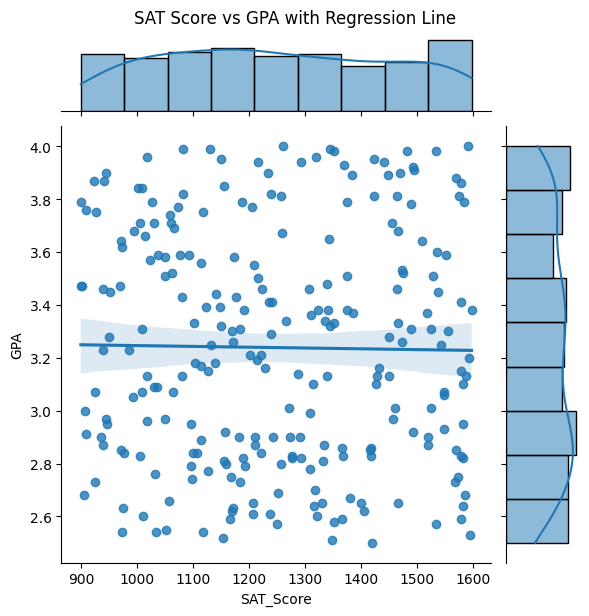

In [41]:
# Joint Plot (Scatter + histograms)
sns.jointplot(data=df, x='SAT_Score', y='GPA', kind='reg')
plt.suptitle('SAT Score vs GPA with Regression Line', y=1.02)
plt.show()